# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from colorama import Fore
from colorama import Style
import datetime
x = datetime.datetime.now()

# Automatically set Data Frames to 2 decimal places
pd.options.display.precision = 2

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# print(x.strftime("%d""/""%m""/""%Y"))

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Specify the API URL and that we want to return the units of measurement to return the information in 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# cities = ["Perth", "Melbourne", "abcd", "Superman", "Karratha", "Brisbane"]

# Build partial query URL 
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# Set up lists to hold response information 
temperature = []
latitude = []
longitude = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []

In [6]:
city_count = 1
total_cities = len(cities)
print("-----------------------------------")
print("Starting API Call - Retrieving Data")
print("-----------------------------------")

# Loop through the list of cities and perform a request for data on each city 
for city in cities:

# Call the API and if successful, append the information for each city into the relevant lists
    response = requests.get(query_url + city).json()
    
    print(f"Making request number: {city_count} of {total_cities} | {city}")
    
    try: 
        city_count = city_count + 1
        temperature.append(response["main"]["temp"])    
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])

# If unsuccessful, do not append and print below statement

    except(KeyError, IndexError):
        print(f"{Fore.RED}City not found. Skipping....{Style.RESET_ALL}")
         
    
print("-----------------------------------")
print("Data Retrieval Finalised")
print("-----------------------------------")

-----------------------------------
Starting API Call - Retrieving Data
-----------------------------------
Making request number: 1 of 626 | rikitea
Making request number: 2 of 626 | cabanas
Making request number: 3 of 626 | raudeberg
Making request number: 4 of 626 | garut
Making request number: 5 of 626 | bara
Making request number: 6 of 626 | montrose
Making request number: 7 of 626 | muros
Making request number: 8 of 626 | nishihara
Making request number: 9 of 626 | gotsu
Making request number: 10 of 626 | attawapiskat
City not found. Skipping....
Making request number: 11 of 626 | kaitangata
Making request number: 12 of 626 | mys shmidta
City not found. Skipping....
Making request number: 13 of 626 | portland
Making request number: 14 of 626 | chokurdakh
Making request number: 15 of 626 | mahebourg
Making request number: 16 of 626 | caravelas
Making request number: 17 of 626 | ahipara
Making request number: 18 of 626 | mataura
Making request number: 19 of 626 | saleaula
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a data frame to hold requested information
weather_df = pd.DataFrame({"City": city_name, "Temperature (f)": temperature, "Latitude": latitude, "Longitude": longitude, "Humidity (%)": humidity, "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})
weather_df 

,City,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,72.70,-23.12,-134.97,84,100,15.21
1,Cabañas,79.93,22.98,-82.92,79,89,2.46
2,Raudeberg,52.88,61.99,5.14,93,90,9.17
3,Garut,78.31,-7.20,107.89,66,56,3.80
4,Bara,74.25,10.37,10.73,84,93,6.38
...,...,...,...,...,...,...,...
559,Kargil,58.12,34.57,76.10,34,0,2.68
560,Okha,59.67,53.57,142.95,78,94,9.19
561,Oranjemund,52.39,-28.55,16.43,77,6,6.96
562,Roseau,79.97,15.30,-61.39,80,1,6.98


In [9]:
# Export to CSV
weather_df.to_csv("../output_data/temperature_file.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [77]:
# Find out if there are any values 100% of over for Humidity
weather_df.describe()

,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
count,564.00,564.00,564.00,564.00,564.00,564.00
mean,68.15,19.24,20.17,71.20,48.70,7.72
std,14.18,33.06,89.90,20.94,38.32,5.43
min,32.00,-54.80,-175.20,1.00,0.00,0.43
25%,57.15,-7.28,-58.94,61.00,6.00,3.36
50%,69.93,20.71,24.66,76.00,48.00,6.61
75%,79.56,47.14,99.49,87.00,88.25,10.91
max,100.36,78.22,178.42,100.00,100.00,28.86


The max value for Humidity is 100 meaning that we need to drop some values

In [78]:
# Drop any values that are 100% or over for Humidity.
humidity_drop = weather_df.loc[weather_df["Humidity (%)"]<100]
humidity_drop

,City,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,72.70,-23.12,-134.97,84,100,15.21
1,Cabañas,79.93,22.98,-82.92,79,89,2.46
2,Raudeberg,52.88,61.99,5.14,93,90,9.17
3,Garut,78.31,-7.20,107.89,66,56,3.80
4,Bara,74.25,10.37,10.73,84,93,6.38
...,...,...,...,...,...,...,...
559,Kargil,58.12,34.57,76.10,34,0,2.68
560,Okha,59.67,53.57,142.95,78,94,9.19
561,Oranjemund,52.39,-28.55,16.43,77,6,6.96
562,Roseau,79.97,15.30,-61.39,80,1,6.98


In [13]:
# Export the City_Data into a csv
humidity_drop.to_csv("../output_data/humidity_drop.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

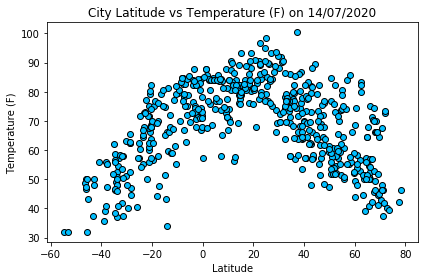

In [117]:
# Generate a scatter plot of latitude versus temperature
plt.scatter(humidity_drop["Latitude"], humidity_drop["Temperature (f)"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"City Latitude vs Temperature (F) on {date}")

# Save image
plt.tight_layout()
plt.savefig("../output_data/City_Latitude_vs_Temperature_(F).png")
plt.show()

## Latitude vs. Humidity Plot

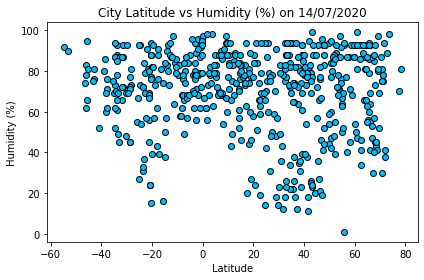

In [118]:
# Generate a scatter plot of latitude versus humidity

plt.scatter(humidity_drop["Latitude"], humidity_drop["Humidity (%)"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"City Latitude vs Humidity (%) on {date}")

# Save image
plt.tight_layout()
plt.savefig("../output_data/City_Latitude_vs_Humidity_(%).png")
plt.show()

## Latitude vs. Cloudiness Plot

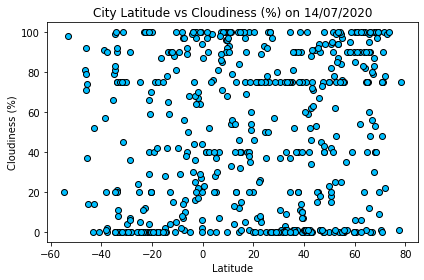

In [119]:
# Generate a scatter plot of latitude versus cloudiness

plt.scatter(humidity_drop["Latitude"], humidity_drop["Cloudiness (%)"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"City Latitude vs Cloudiness (%) on {date}")

# Save image
plt.tight_layout()
plt.savefig("../output_data/City_Latitude_vs_Cloudiness_(%).png")
plt.show()

## Latitude vs. Wind Speed Plot

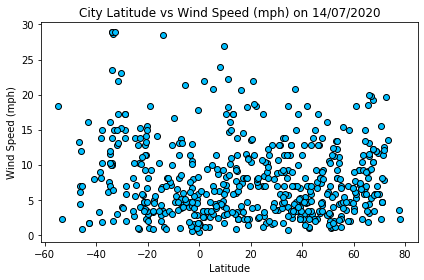

In [120]:
# Generate a scatter plot of latitude versus wind speed

plt.scatter(humidity_drop["Latitude"], humidity_drop["Wind Speed (mph)"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"City Latitude vs Wind Speed (mph) on {date}")

# Save image
plt.tight_layout()
plt.savefig("../output_data/City_Latitude_vs_Wind_Speed_(mph).png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [129]:
# Create Northern Hemisphere Data Frames
northern = humidity_drop.loc[humidity_drop["Latitude"]>=0]
northern

,City,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
1,Cabañas,79.93,22.98,-82.92,79,89,2.46
2,Raudeberg,52.88,61.99,5.14,93,90,9.17
4,Bara,74.25,10.37,10.73,84,93,6.38
5,Montrose,74.46,38.42,-108.27,31,75,17.22
6,Muros,62.01,42.78,-9.06,79,62,7.00
...,...,...,...,...,...,...,...
557,Rawlins,77.97,41.79,-107.24,11,1,18.34
559,Kargil,58.12,34.57,76.10,34,0,2.68
560,Okha,59.67,53.57,142.95,78,94,9.19
562,Roseau,79.97,15.30,-61.39,80,1,6.98


In [122]:
# Create Southern Hemisphere Data Frames
southern = humidity_drop.loc[humidity_drop["Latitude"]<0]
southern

,City,Temperature (f),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,72.70,-23.12,-134.97,84,100,15.21
3,Garut,78.31,-7.20,107.89,66,56,3.80
9,Kaitangata,50.00,-46.28,169.85,62,71,7.00
12,Mahébourg,68.00,-20.41,57.70,88,20,2.24
13,Caravelas,69.87,-17.71,-39.25,91,0,4.99
...,...,...,...,...,...,...,...
542,Wewak,83.53,-3.55,143.63,69,44,6.15
549,Santa Luzia,62.60,-19.77,-43.85,82,0,2.01
553,Mórrope,62.62,-6.54,-80.01,87,38,13.15
558,Coyhaique,32.00,-45.58,-72.07,95,74,6.93


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The correlation between Temperature (f) and Latitude is -0.68



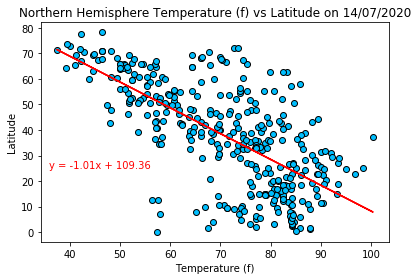

In [130]:
# Generate a scatter plot of Northern Hemisphere Temp versus Latitude

plt.scatter(northern["Temperature (f)"], northern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Temperature (f)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Northern Hemisphere Temperature (f) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(northern["Temperature (f)"], northern["Latitude"])
regress_values = (northern["Temperature (f)"]) * slope + intercept

plt.plot((northern["Temperature (f)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(35.8,25, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(northern["Temperature (f)"], northern["Latitude"])
print(f"\nThe correlation between Temperature (f) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Northern_Hemisphere_Temperature_(f)_vs_Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The correlation between Temperature (f) and Latitude is 0.77



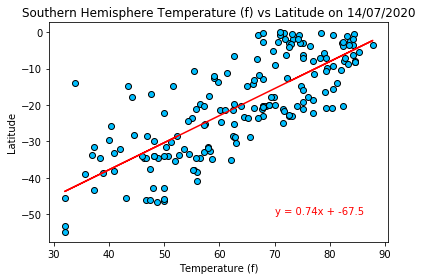

In [125]:
# Generate a scatter plot of Southern Hemisphere Temp versus Latitude

plt.scatter(southern["Temperature (f)"], southern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Temperature (f)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Southern Hemisphere Temperature (f) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(southern["Temperature (f)"], southern["Latitude"])
regress_values = (southern["Temperature (f)"]) * slope + intercept

plt.plot((southern["Temperature (f)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(70,-50, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(southern["Temperature (f)"], southern["Latitude"])
print(f"\nThe correlation between Temperature (f) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Southern_Hemisphere_Temperature_(f)_vs_Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The correlation between Humidity (%) and Latitude is -0.05



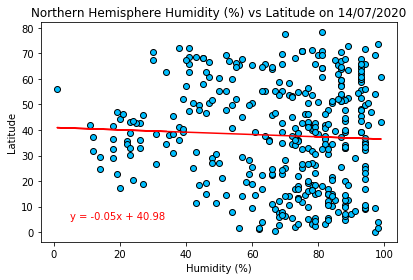

In [131]:
# Generate a scatter plot of Northern Hemisphere Humidity versus Latitude

plt.scatter(northern["Humidity (%)"], northern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Northern Hemisphere Humidity (%) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(northern["Humidity (%)"], northern["Latitude"])
regress_values = (northern["Humidity (%)"]) * slope + intercept

plt.plot((northern["Humidity (%)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(5,5, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(northern["Humidity (%)"], northern["Latitude"])
print(f"\nThe correlation between Humidity (%) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Northern_Hemisphere_Humidity_(%)_vs_Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The correlation between Humidity (%) and Latitude is 0.1



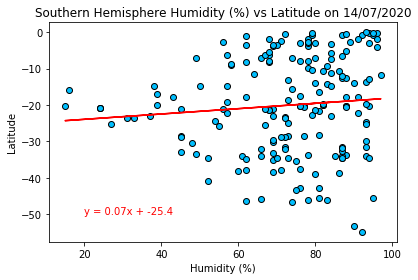

In [128]:
# Generate a scatter plot of Southern Hemisphere Humidity versus Latitude

plt.scatter(southern["Humidity (%)"], southern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Southern Hemisphere Humidity (%) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(southern["Humidity (%)"], southern["Latitude"])
regress_values = (southern["Humidity (%)"]) * slope + intercept

plt.plot((southern["Humidity (%)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(20,-50, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(southern["Humidity (%)"], southern["Latitude"])
print(f"\nThe correlation between Humidity (%) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Southern_Hemisphere_Humidity_(%)_vs_Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The correlation between Cloudiness (%) and Latitude is 0.04



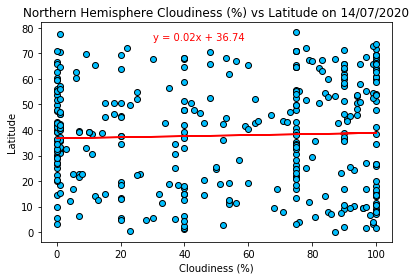

In [132]:
# Generate a scatter plot of Northern Hemisphere Cloudiness versus Latitude

plt.scatter(northern["Cloudiness (%)"], northern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Northern Hemisphere Cloudiness (%) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(northern["Cloudiness (%)"], northern["Latitude"])
regress_values = (northern["Cloudiness (%)"]) * slope + intercept

plt.plot((northern["Cloudiness (%)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(30,75, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(northern["Cloudiness (%)"], northern["Latitude"])
print(f"\nThe correlation between Cloudiness (%) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Northen_Hemisphere_Cloudiness_(%)_vs_Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The correlation between Cloudiness (%) and Latitude is 0.06



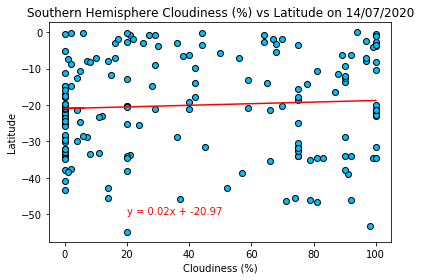

In [133]:
# Generate a scatter plot of Southern Hemisphere Cloudiness versus Latitude

plt.scatter(southern["Cloudiness (%)"], southern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Southern Hemisphere Cloudiness (%) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(southern["Cloudiness (%)"], southern["Latitude"])
regress_values = (southern["Cloudiness (%)"]) * slope + intercept

plt.plot((southern["Cloudiness (%)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(20,-50, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(southern["Cloudiness (%)"], southern["Latitude"])
print(f"\nThe correlation between Cloudiness (%) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Southern_Hemisphere_Cloudiness_(%)_vs_Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The correlation between Wind Speed (mph) and Latitude is 0.01



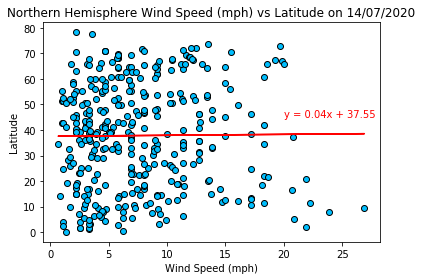

In [134]:
# Generate a scatter plot of Northern Hemisphere Wind Speed versus Latitude

plt.scatter(northern["Wind Speed (mph)"], northern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Northern Hemisphere Wind Speed (mph) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(northern["Wind Speed (mph)"], northern["Latitude"])
regress_values = (northern["Wind Speed (mph)"]) * slope + intercept

plt.plot((northern["Wind Speed (mph)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(20,45, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(northern["Wind Speed (mph)"], northern["Latitude"])
print(f"\nThe correlation between Wind Speed (mph) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Northen_Hemisphere_Wind_Speed_(mph)_vs_Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The correlation between Wind Speed (mph) and Latitude is -0.29



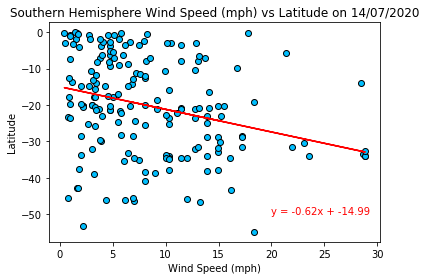

In [135]:
# Generate a scatter plot of Southern Hemisphere Wind Speed versus Latitude

plt.scatter(southern["Wind Speed (mph)"], southern["Latitude"], marker="o", facecolors="deepskyblue", edgecolors="black")

# # Set x label and y label
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

# Date of analysis
date = (x.strftime("%d""/""%m""/""%Y"))

# Set Title with date of analysis
plt.title(f"Southern Hemisphere Wind Speed (mph) vs Latitude on {date}")

# Calculate the linear regression and correlation
(slope, intercept,r_value,p_value,std_err) = st.linregress(southern["Wind Speed (mph)"], southern["Latitude"])
regress_values = (southern["Wind Speed (mph)"]) * slope + intercept

plt.plot((southern["Wind Speed (mph)"]),regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.text(20,-50, line_annotation, fontsize = 10, color="red");

correlation = st.pearsonr(southern["Wind Speed (mph)"], southern["Latitude"])
print(f"\nThe correlation between Wind Speed (mph) and Latitude is {round(correlation[0],2)}\n")

# Save image
plt.tight_layout()
plt.savefig("../output_data/Southern_Hemisphere_Wind_Speed_(mph)_vs_Latitude.png")
plt.show()